In [1]:
import numpy as np
import scipy as sp
from scipy.sparse import diags, kron, csr_matrix, csc_matrix
from scipy.sparse.linalg import spsolve, norm, inv, eigsh
import matplotlib.pyplot as plt
from matplotlib import rc
# rc('text', usetex=True) # para usar latex en matplotlib

*Universidad de Chile*  
*Facultad de Ciencias Físicas y Matemáticas*  
*Departamento de Ingeniería Matemática*

**MA5307-1 Análisis Numérico de EDP: Teoría y Laboratorio**  
**Profesor:** Axel Osses  
**Auxiliares:** Nicolás Barnafi, Sebastián Tapia, Tomás Banduc
**Integrantes:** Catalina Lizana G., Felipe Espinosa V., Fabián C. Ulloa

# Laboratorio 1

El objetivo de esta sesión práctica es aprender a resolver EDP’s en 2 dimensiones mediante el Método de las Diferencias Finitas.

Específicamente se resolverá la ecuación de Poisson en un rectángulo unitario y en un dominio perforado, además se estudiará la aproximación para condiciones de borde en dominios con curvatura

# Parte a

## Ecuación de Poisson

Considere la ecuación dada por
$$
\begin{aligned}
    \quad (1) \left\{
    \begin{aligned}
    -\Delta u= & 0 & \text{sobre }\Omega=\left[  0,1\right]^{2}\\
    u(0,y)=u(1,y)= & 0 & \text{en }0\leq y\leq 1\\
    u(x,0)= & 0 & \text{en }0\leq x\leq 1\\
    u(x,1)= & g(x) & \text{en }0\leq x\leq 1
    \end{aligned}
    \right.
\end{aligned}
$$

Sea $N\in\mathbb{N}$, considere la aproximación del cuadrado unitario dado por la malla de puntos
$$
\Omega_{h}=\left\{  \left(  x_{j},y_{k}\right)  \mid j,k\in\left\{
0,1,\ldots,N+1\right\}  \right\}
$$
donde $x_{j}=jh$, $y_{k}=kh$, $h=\dfrac{1}{N+1}$. Se define el operador laplaciano discretizado por 5 puntos como
$$
\Delta_{N}u_{j,k}=\dfrac{1}{h^{2}}\left(  u_{j+1,k}+u_{j-1,k}
+  u_{j,k-1}+u_{j,k+1}
-4u_{jk}\right)
$$
donde $u_{jk}$ aproxima a $u\left(x_{j},y_{k}\right)  $.

Tomando $g(x) = \sin(\pi x)$, se puede demostrar que la solución única de esta ecuación está dada por

$$
u\left(  x,y\right)  =\frac{\sin\left( \pi x\right)   \sinh\left( \pi y\right)  }{\sinh\left(  \pi\right) } 
$$

**P1.** Escriba dos funciones que calculen $\boldsymbol{A}_{h}$ y $\boldsymbol{b}_{h}$ de la forma más simple posible. Las entradas para estas funciones deben ser $N$ y $g$.

También escriba una función `solve` que, utilizando estas funciones (y las funciones auxiliares que necesite), entregue la solución aproximada.

**Indicación.** Revise la documentación del comando `kron` (disponible a través de `scypy.sparse`)

In [2]:
def Ah(N):
    h = 1/(N+1)
 
    e_1 = np.ones(N)
    f = np.ones(N-1)
    k = np.array([-f,4*e_1,-f], dtype= object)
    offset = [-1,0,1]
    L_4 = sp.sparse.diags(k,offset)
    K_matrix = L_4-4*np.identity(N)
    A = kron(np.identity(N), L_4) + kron(K_matrix, np.identity(N))
    
    return (1/(h**2))*(A)


def bh(N,f,g):
    h = 1/(N+1)
    b = np.zeros((N**2))

    for k in range(1, N+1):
        for j in range(1, N+1):
            x_j = j*h
            y_k = k*h
            n = (k-1)*N + j

            if k == N:
                b[n-1] = f(x_j, y_k) + (1/(h**2)) * g(x_j)
            else:
                b[n-1] = f(x_j, y_k)

    return b 

def solve(N, f, g):
    """Resuelve el problema del laplaciano en 2D en (0,1)^2, con condiciones
    Dirichlet en el borde, usando una grilla uniforme, con tamano de
    paso h=1/N en x e y.
    """
    A = Ah(N)
    B = bh(N, f, g)
    u = sp.sparse.linalg.spsolve(A,B)
    
    return u

**P2.** Resuelva la ecuación para $N = 10, 20, 30, 40, 50$. Comente sus resultados.

In [3]:
Ns = [10, 20, 30, 40, 50]
sols = []

f = lambda x,y: 0
g = lambda x: np.sin(np.pi*x)

for N in Ns:
    u = solve(N, f, g)
    sols.append(u)

Solución para N= 10


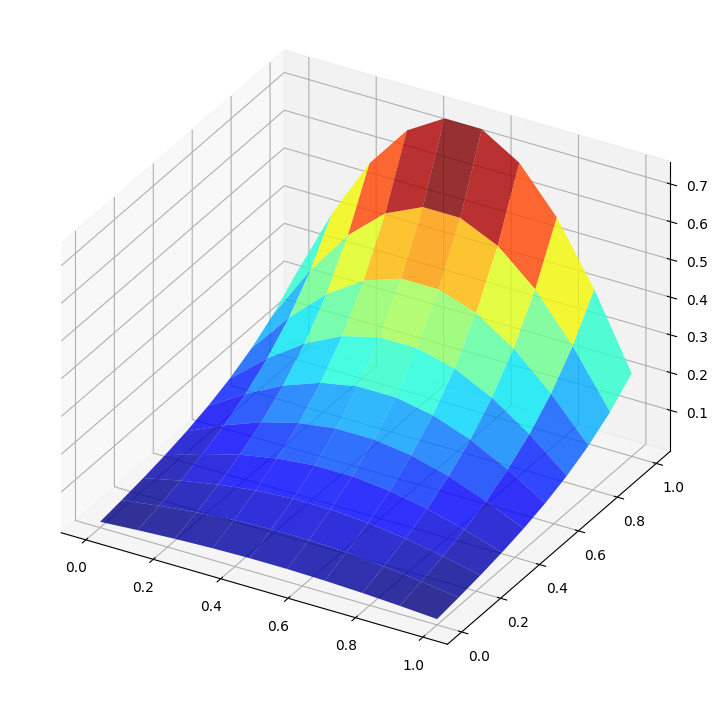

Solución para N= 20


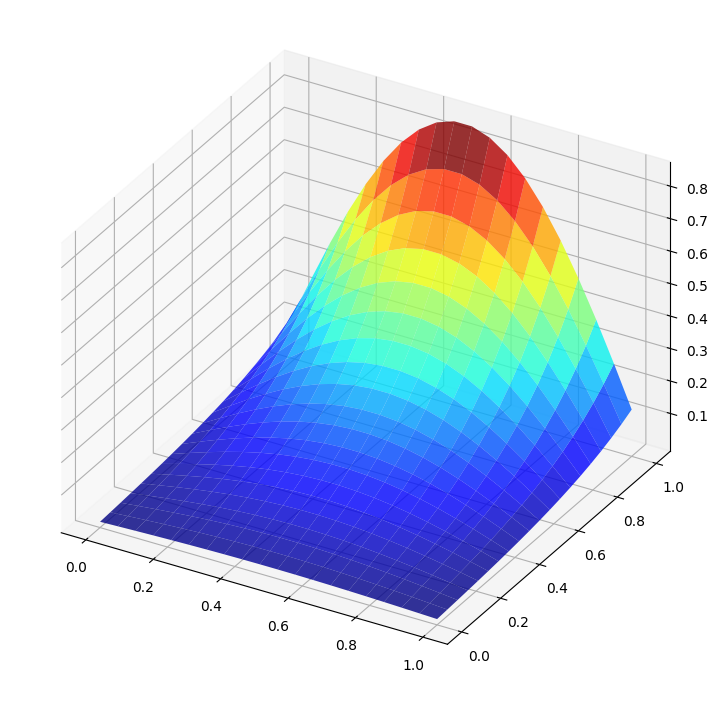

Solución para N= 30


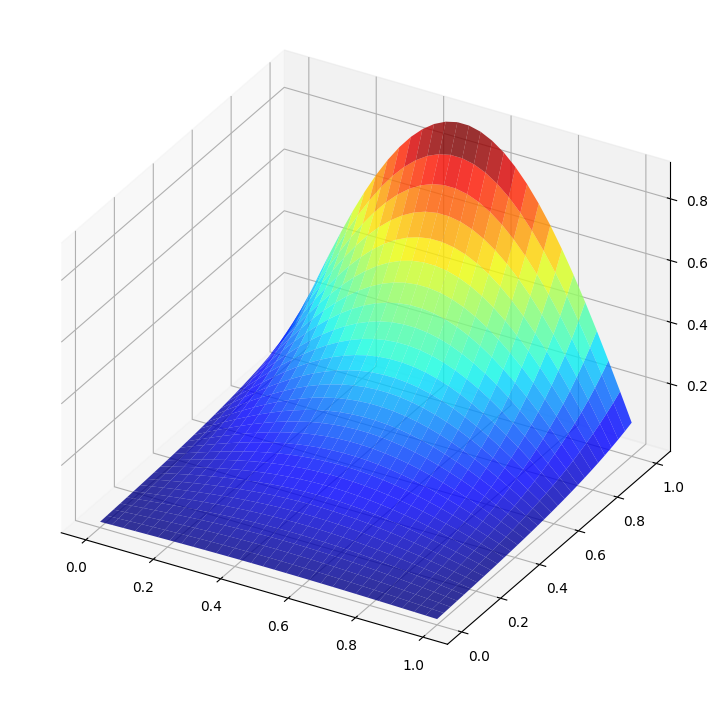

Solución para N= 40


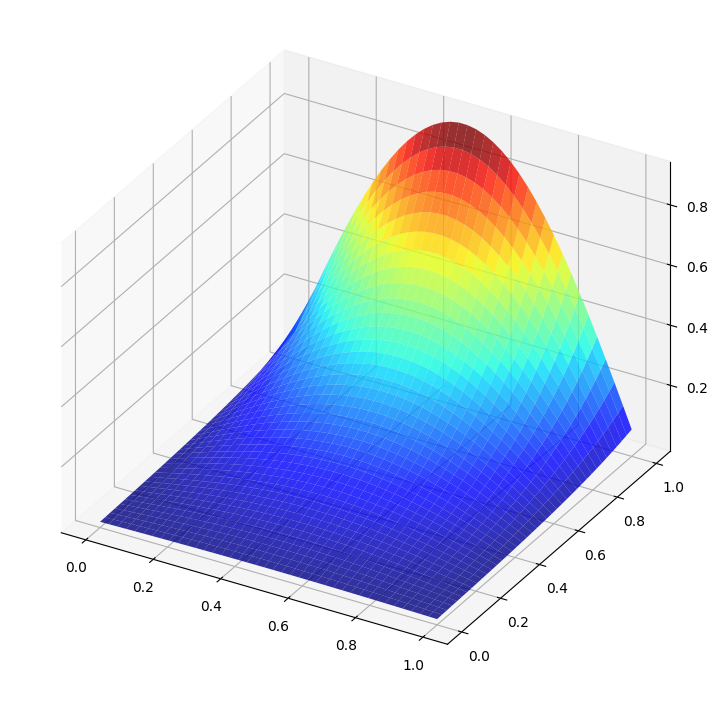

Solución para N= 50


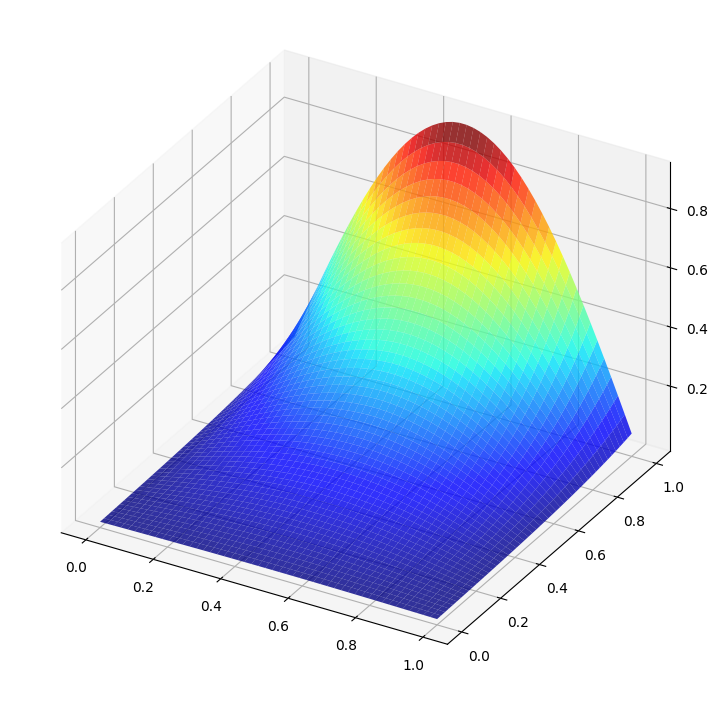

In [4]:
for i in range(len(sols)):
    xx = np.linspace(0, 1, Ns[i])
    yy = np.linspace(0, 1, Ns[i])
    X, Y = np.meshgrid(xx, yy, indexing= 'ij')
    print("Solución para N=",Ns[i])
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, np.transpose(sols[i].reshape((Ns[i],Ns[i]))), alpha= 0.8, cmap='jet')
    ax.set_proj_type('ortho') #Ángulo en que se mira el gráfico
    plt.show()

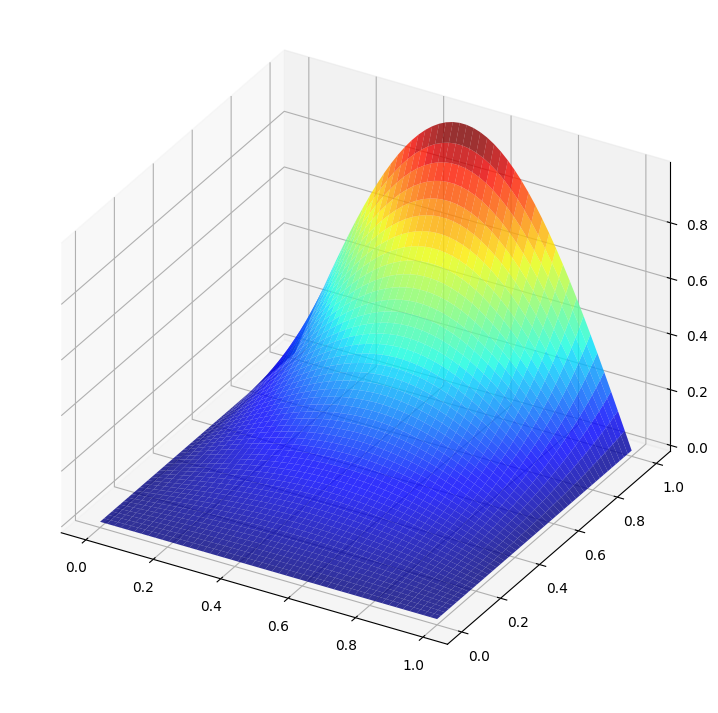

In [5]:
# Grafico de la función analitica

u_analitica = lambda x,y : np.sin(np.pi*x)*np.sinh(np.pi*y)/np.sinh(np.pi)

xx = np.linspace(0,1,50)
yy = np.linspace(0,1,50)

X, Y = np.meshgrid(xx, yy, indexing= 'ij')
Z = u_analitica(X,Y)

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha= 0.8, cmap='jet')
ax.set_proj_type('ortho') #Ángulo en que se mira el gráfico
plt.show()

Notamos que la solución aproximada es bastante similar a la analítica. La principal diferencia radica en las condiciones de borde. Pero recordemos que la solución aproximada solo considera los puntos interiores, solo bastaría añadir estos valores borde (que son conocidos) a la solución que se genera. Además es claro que a medida que N crece, mejor es la aproximación a la solución.

**P3.** Estudie el condicionamiento en norma $2$ de la Matriz $A_h$.

**Indicación.** Sean $p\in\left[  1,+\infty\right]  $ y $\boldsymbol{A}\in\mathbb{R}^{N\times N}$. Se define la norma inducida $p$ de $\boldsymbol{A}$ como
$$
\left\Vert \boldsymbol{A}\right\Vert _{p}=\sup\limits_{\boldsymbol{x\in}\mathbb{R}^{N}\setminus\left\{  \boldsymbol{0}\right\}  }\dfrac{\left\Vert\boldsymbol{Ax}\right\Vert _{p}}{\left\Vert \boldsymbol{x}\right\Vert_{p}}
$$
y, si $\boldsymbol{A}$ es invertible, el número de condición en norma inducida $p$ como $\operatorname{cond}_{p}\left(  \boldsymbol{A}\right)  =\left\Vert
\boldsymbol{A}\right\Vert _{p}\left\Vert \boldsymbol{A}^{-1}\right\Vert _{p}$.

En este caso particular, como $\boldsymbol{A}_{h}$ es simétrica, el número de condición en la norma $2$ inducida puede calcularse como
$$
\operatorname{cond}_{2}\left(  \boldsymbol{A}_{h}\right)  =\dfrac{\lambda_{\max,h}\left(  \boldsymbol{A}_{h}\right)  }{\lambda_{\min,h}\left(\boldsymbol{A}_{h}\right)}
$$
donde $\lambda_{\max,h}\left(  \boldsymbol{A}_{h}\right)  =\max\left\{\left\vert \lambda\right\vert \mid\lambda\in\sigma\left(  \boldsymbol{A}_{h}\right)  \right\}  $ y $\lambda_{\min,h}\left(  \boldsymbol{A}_{h}\right)
=\min\left\{  \left\vert \lambda\right\vert \mid\lambda\in\sigma\left(\boldsymbol{A}_{h}\right)  \right\}  $.

In [6]:
def cond_2_sparse(A):
    """
    Calcula el numero de condicionamiento en norma inducida 2
    para una matriz sparse simetrica A.
    Se obtiene como el valor propio de mayor módulo dividido por el de menor módulo
    
    Input:
    - A matriz sparse simetrica
    
    Documentacion de eigsh:
    https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.sparse.linalg.eigsh.html
    """
    val_pp = eigsh(A, np.shape(A)[0]-1)[0]
    cond = max(abs(np.array(val_pp))) / min(abs(np.array(val_pp)))
    
    return cond

In [7]:
condicionamientos = []
hs = [1/(N+1) for N in Ns]
for N in Ns:
    A = Ah(N)
    condicionamientos.append(cond_2_sparse(A))

Text(0.5, 1.0, 'Condicionamiento 2 según h')

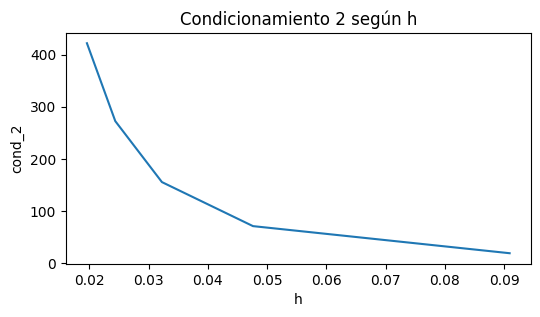

In [8]:
fig = plt.figure(figsize=(6, 3))
plt.plot(hs, condicionamientos)
plt.xlabel('h')
plt.ylabel('cond_2')
plt.title('Condicionamiento 2 según h')

Notamos que a medida que h decrece (i.e. crece N), el condicionamiento crece, lo que conlleva un mal condicionamiento y por lo tanto a soluciones inestables. Además notar que el condicionamiento crece cuadráticamente cuando h decrece:

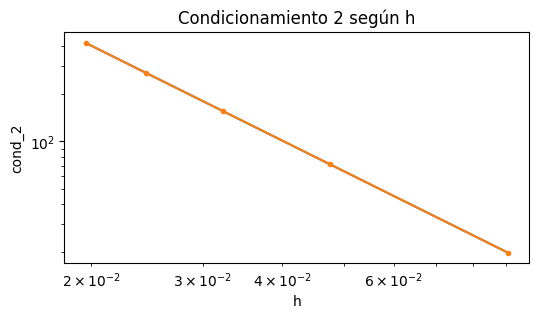

In [9]:
fig = plt.figure(figsize=(6, 3))
plt.plot(hs, condicionamientos)
plt.xlabel('h')
plt.ylabel('cond_2')
plt.title('Condicionamiento 2 según h')
plt.loglog(hs, condicionamientos,'.-')

# Parte b

## Ecuación en Dominios Perforados

Para $\Omega = [0, 1]^2\backslash B ((0.5, 0.5), 0.3)$, considere:
$$
\left(  P \right)  \left\{
\begin{aligned}
-\Delta u(x,y)= ~ &0,  & \text{ si }(x,y)\text{ en }\Omega \\
u(x,y)= ~ &g(x,y), & \text{ si } (x,y)\text{ en }\partial\Omega
\end{aligned}
\right.
$$

y $g$ dada por:

$$
g\left(  x,y\right)  =\left\{
\begin{aligned}
2  ~ & \text{ si }(x,y) \in \partial [0,1]^2 \\
0  ~ & \text{ si }(x,y) \in \partial B ((0.5, 0.5), 0.3)
\end{aligned}
\right.
$$






**P1.** Genere una función que reciba un punto de la malla $(x_j , y_k)$ y entregue como resultado $1$ si es un
punto interior al cual se le puede calcular $\Delta u$ con la aproximación utilizada en la fórmula de $5$ puntos.

In [10]:
# N**2: número de puntos interiores
#(x,y) en el cuadrado [0,N+1]**2
#(x*h,y*h) en el cuadrado [0,1]**2

def punto(x,y,N):

    h=1/(N+1)

    #if x==0 or x==N+1 or y==0 or y==N+1:    #Puntos en el borde del cuadrado
     #   return 2

    Puntos_x = h*np.array([[x+1,y],[x-1,y]])           #Puntos adyacentes en x
    Puntos_y = h*np.array([[x,y+1],[x,y-1]])           #Puntos adyacentes en y 
    centro=np.array([0.5,0.5])                         #Centro del circulo 
    
    for p in Puntos_x:                               #
        dist= np.linalg.norm(centro-p,2)       
        if dist<0.3: 
            return 3              # Punto dentro del círculo en x

    for p in Puntos_y:
        dist= np.linalg.norm(centro-p,2)
        if dist<0.3: 
            return 4               # Punto dentro del círculo en y

    return 1 


In [11]:
punto(1,1,5)

1

**P2.** Asuma que la matriz del sistema es de la forma $A = A_x + A_y$, donde $A_x$ tiene los coeficientes adecuados
para la aproximación de la derivada parcial según $x$ y lo equivalente para $A_y$. Encuentre la forma
que deben tener $A_x$ y $A_y$ y escriba un programa que calcule dichas matrices.

In [12]:
#N**2: Número de puntos interiores

def Ahx(N):
    h=1/(N+1)
    Ax = np.zeros(((N)**2, (N)**2))
    for i in range((N)**2):
        x = i%(N)+1
        y = (i-x+1)/(N)+1
        
        #Puntos dentro del círculo
        if np.linalg.norm(np.array([0.5-x*h,0.5-y*h]),2)<=0.3:   
            Ax[i,i]=1
         
        #Puntos al lado del borde del cuadrado
        elif x==N:                 
            Ax[i,i] = 2  
            Ax[i,i-1]=-1

        elif x==1:
            Ax[i,i] = 2
            Ax[i,i+1]=-1

        #Puntos que no tienen un punto adyacente(en x) dentro del círculo
        elif punto(x,y,N)==4 or punto(x,y,N)==1:  
            Ax[i,i] = 2
            Ax[i,i+1] = -1
            Ax[i,i-1] = -1
       
        #Puntos que tienen un punto adyacente(en x) dentro del círculo
        elif punto(x,y,N)==3 and np.linalg.norm(np.array([0.5-x*h,0.5-y*h]),2)>0.3:
        
            #epsilon = max(np.abs(np.abs(x*h-0.5)-np.sqrt(0.3**2-np.abs(y*h-0.5)**2)), 10**(-2*N) )
            epsilon = np.abs(np.abs(x*h-0.5)-np.sqrt(0.3**2-np.abs(y*h-0.5)**2))
            alpha = 2/(h**2+ h*epsilon)
            gamma = 2/(h*epsilon+ epsilon**2)
            beta = -(alpha+gamma)

            Ax[i,i]= beta
            Ax[i,i-1]= gamma
            Ax[i,i+1]= alpha 
          

    return (1/(h**2))*(Ax)
    


def Ahy(N):
    h = 1/(N+1)
    Ay = np.zeros(((N)**2, (N)**2))

    for i in range((N)**2):
        x = i%(N)+1 
        y = (i-x+1)/(N)+1
        
        #Puntos dentro del círculo
        if np.linalg.norm(np.array([0.5-x*h,0.5-y*h]),2)<=0.3:
            Ay[i,i]=1

        #Puntos al lado del borde del cuadrado
        elif y==N:
            Ay[i,i] = 2
            Ay[i,i-N]=-1

        elif y==1:
            Ay[i,i] = 2
            Ay[i,i+N]=-1


        #Puntos que no tienen un punto adyacente(en y) dentro del círculo
        elif punto(x,y,N)==3 or punto(x,y,N)==1:
                Ay[i,i] = 2
                Ay[i,i+N] = -1
                Ay[i,i-N] = -1

        #Puntos que tienen un punto adyacente(en y) dentro del círculo
        elif punto(x,y,N)==4 and np.linalg.norm(np.array([0.5-x*h,0.5-y*h]),2)>0.3:

            #epsilon = max(np.abs(np.abs(y*h-0.5)-np.sqrt(0.3**2-np.abs(x*h-0.5)**2)), 10**(-2*N) )
            #print(epsilon)
            epsilon =np.abs(np.abs(y*h-0.5)-np.sqrt(0.3**2-np.abs(x*h-0.5)**2))
            alpha = 2/(h**2+ h*epsilon)
            gamma = 2/(h*epsilon+ epsilon**2)
            beta = -(alpha+gamma)

            Ay[i,i]= beta
            Ay[i,i-N]= gamma
            Ay[i,i+N]= alpha 

    
    return (1/(h**2))*(Ay)

**P3.** Escriba una función que calcule $b_h$ adaptado a este caso.

In [13]:
def bh(N):
    g1 = lambda x,y: 2    #Borde del cuadrado
    g2 = lambda x,y: 0    #Borde del círculo
    f = lambda x,y: 0     #Solución del laplaciano

    h = 1/(N+1)
    b = np.zeros(((N)**2))

    for i in range((N)**2):
        x = i%(N)+1 
        y = (i-x+1)/(N)+1
        
        if x==1 or x==N or y==1 or y==N:
            b[i]= f(x,y)+g1(x,y)*(1/(h**2))

        elif np.linalg.norm(np.array([0.5-x*h,0.5-y*h]),2)==0.3:
            b[i]= f(x,y)+g2(x,y)*(1/(h**2))

        else:
            b[i]=0

    return b


def solve2(N):
    A = Ahx(N)+Ahy(N)
    A = sp.sparse.csc_matrix(A)
    B = bh(N)
    u = sp.sparse.linalg.spsolve(A,B)
    
    return u
    


**P4.** Resuelva el sistema y grafique la solución aproximada para $N = 10, 20, 30, 40, 50$. Comente sus resultados.

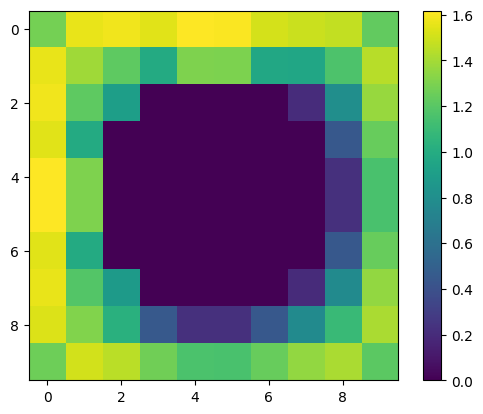

In [14]:
# Primero probamos con N=10
m=np.array(solve2(10)).reshape(10,10)
im=plt.imshow(m)
plt.colorbar(im)
plt.show()

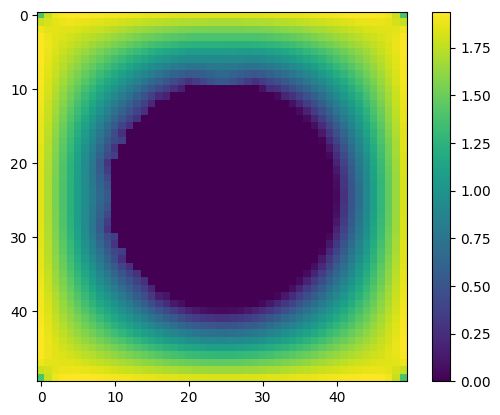

In [22]:
#Probamos con N=30
m=np.array(solve2(50)).reshape(50,50)
im=plt.imshow(m)
plt.colorbar(im)
plt.show()

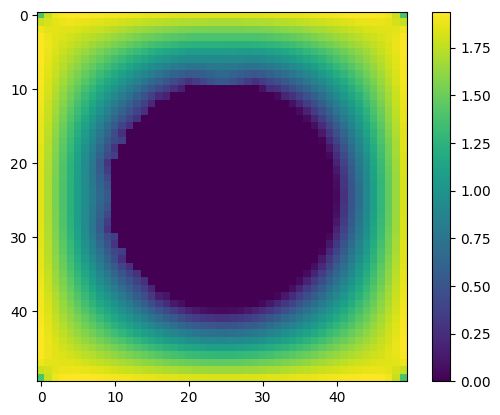

In [15]:
#Probamos con N=50
m=np.array(solve2(50)).reshape(50,50)
im=plt.imshow(m)
plt.colorbar(im)
plt.show()

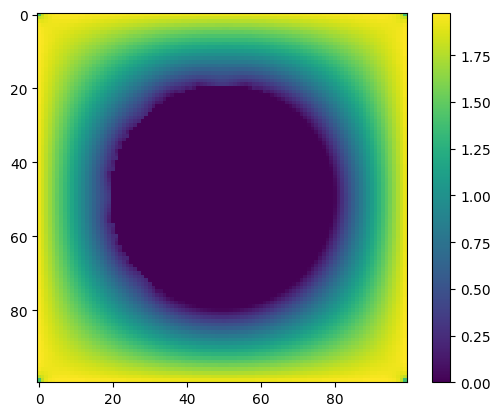

In [16]:
#Probamos con N=100
m=np.array(solve2(100)).reshape(100,100)
im=plt.imshow(m)
plt.colorbar(im)
plt.show()

In [17]:
# Graficos en 3D
Ns = [10, 20, 30, 40, 50]
sols = []


for N in Ns:
    u = solve2(N)
    sols.append(u)


Solución para N= 10


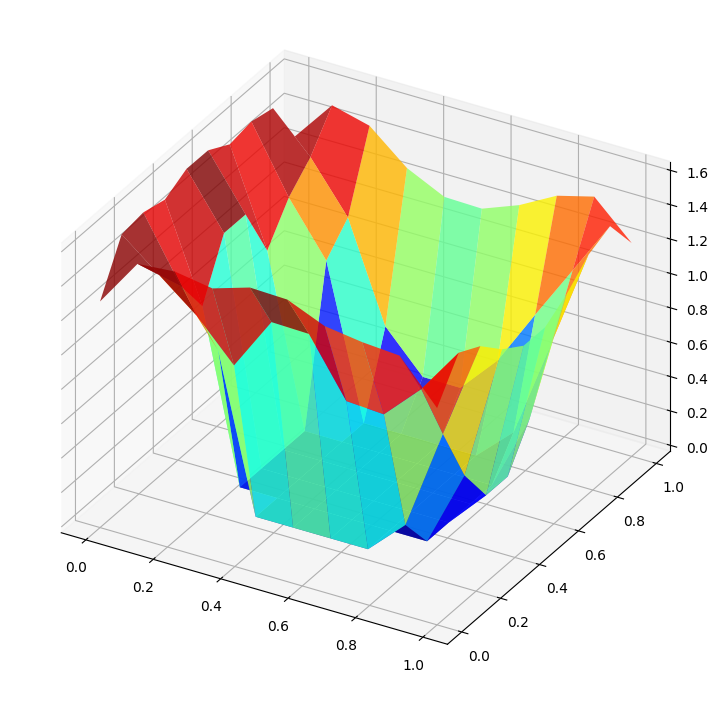

Solución para N= 20


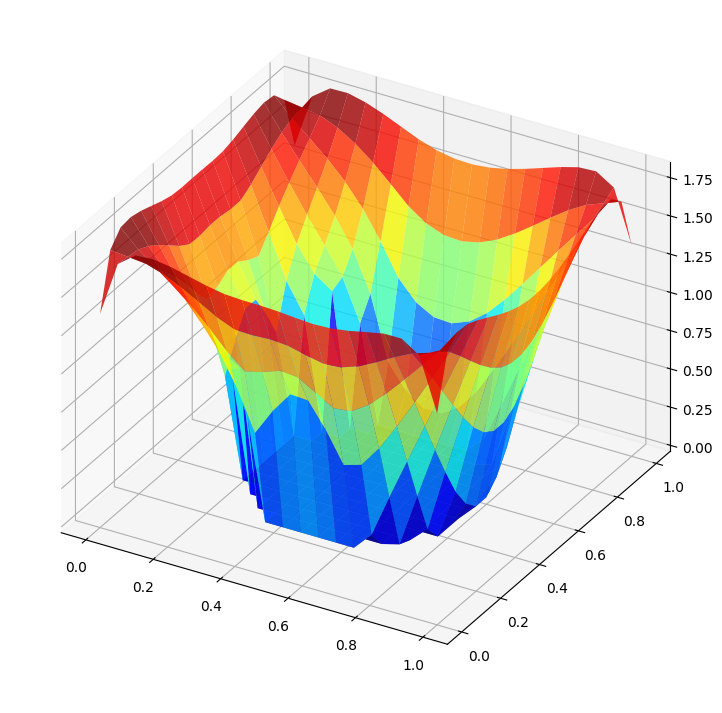

Solución para N= 30


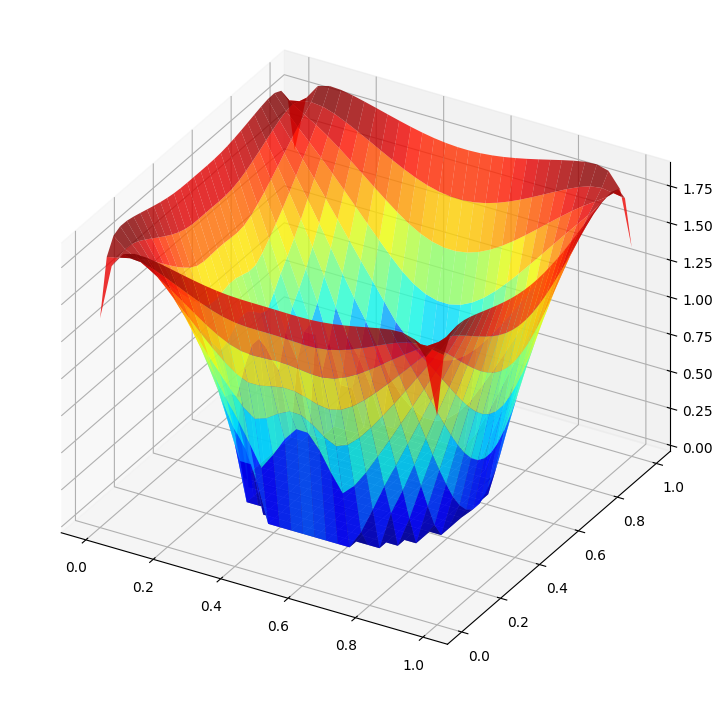

Solución para N= 40


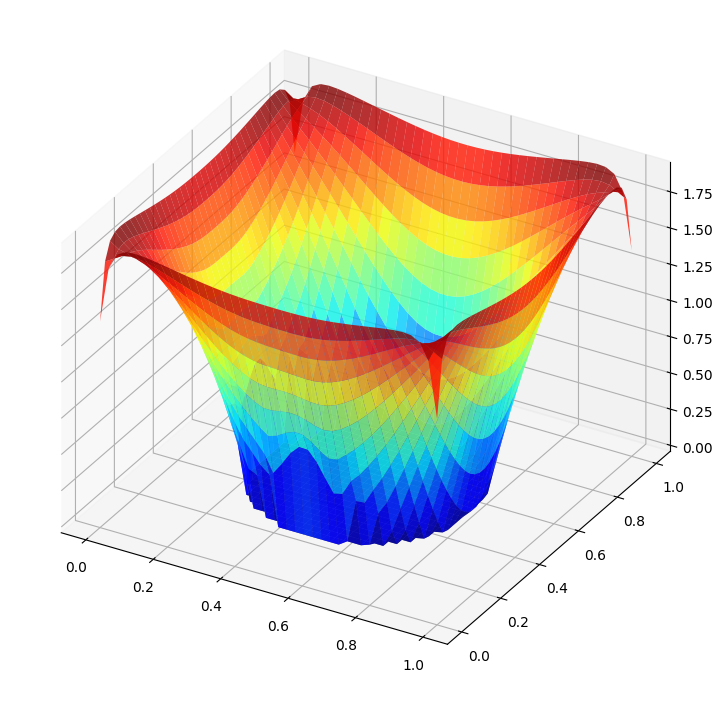

Solución para N= 50


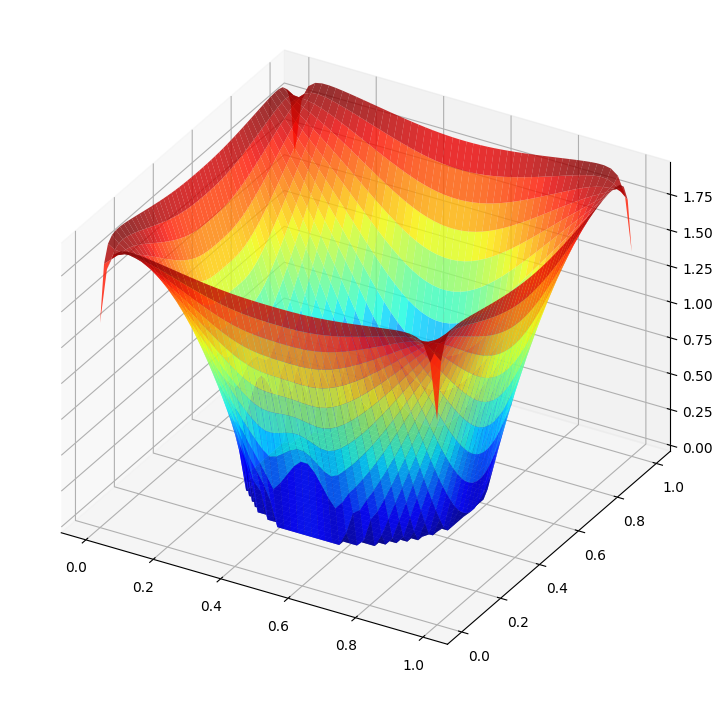

In [18]:
for i in range(len(sols)):
    xx = np.linspace(0, 1, Ns[i])
    yy = np.linspace(0, 1, Ns[i])
    X, Y = np.meshgrid(xx, yy, indexing= 'ij')
    print("Solución para N=",Ns[i])
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, np.transpose(sols[i].reshape((Ns[i],Ns[i]))), alpha= 0.8, cmap='jet')
    ax.set_proj_type('ortho') #Ángulo en que se mira el gráfico
    plt.show()

Notamos que a medida que crece N, en los gráficos se distinguen mejor las transiciones de los valores de la solución aproximada.
Un par de observaciones, es que podemos ver que los gráficos no consideran la condiciones de borde en $\partial [0,1]^2$, esto pues, al momento de obtener la solución aproximada, ésta se calcula solo para los puntos interiores (los de borde son conocidos, y solo bastaría añadirlos). Por otro lado, si bien el circulo interior $B((0.5,0.5), 0.3)$ no pertenece al dominio, la función de igual manera se graficó tomando valor $0$ dentro del circulo (para concordar con la condición de borde), esto se hizo para facilitar la representación de la solución en los gráficos.

**P5.** ¿Qué sucede con el condicionamiento de la matriz utilizando la fórmula de la Parte a?¿Cómo adaptaría su código para el caso $f\neq 0$?

In [19]:
Ns = [10*k for k in range(1,6)]
condicionamientos = []
hs = [1/(N+1) for N in Ns]
for N in Ns:
    A = Ahx(N)+Ahy(N)
    A = sp.sparse.csc_matrix(A)
    condicionamientos.append(cond_2_sparse(A))

Text(0.5, 1.0, 'Condicionamiento 2 según h')

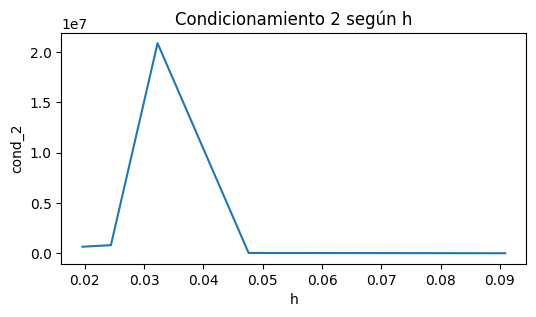

In [20]:
fig = plt.figure(figsize=(6, 3))
plt.plot(hs, condicionamientos)
plt.xlabel('h')
plt.ylabel('cond_2')
plt.title('Condicionamiento 2 según h')

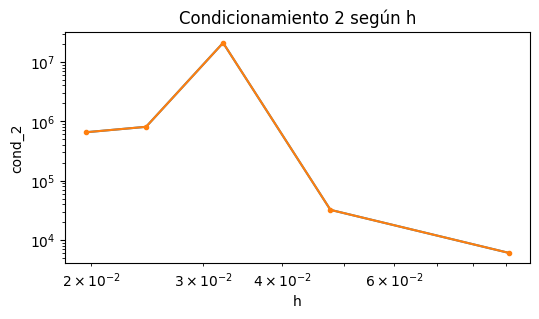

In [21]:
fig = plt.figure(figsize=(6, 3))
plt.plot(hs, condicionamientos)
plt.xlabel('h')
plt.ylabel('cond_2')
plt.title('Condicionamiento 2 según h')
plt.loglog(hs, condicionamientos,'.-')

Dado que el número de condicionamiento esta relacionado con el error de aproximación, lo que importa al intentar resolver un sistema lineal del tipo
$$
Ax = b
$$
es como el error de aproximación se propagara, en el grafico de arriba vemos que la matriz asociada al método de diferencias finitas para el dominio perforado amplifica el error de aproximación.

Vemos entonces en los gráficos, que a medida que h decrece (N crece) el condicionamiento tiende, en general, a aumentar (soluciones inestables), salvo por el caso N=30 en donde el condicionamiento sube abruptamente, para luego decaer pero aún asi se mantiene en valores altos.

 Si $f \neq 0$ se cambia f definida en la función que calcula $b_h$.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=adfbd4a6-4788-4f1f-b880-c4f84df37b0a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>